# Trabajo Práctico N3. Procesamiento de Imágenes

In [76]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import scipy
import scipy.signal
from PIL import Image
from math import pi

In [85]:
def show_side_by_side(imgs, subtitles = None, title = None, vmin=0, vmax=255):
    fig, axes = plt.subplots(1, len(imgs))
    if len(imgs) == 1:
        axes = [axes]
    if title is not None:
        fig.suptitle(title, y=0.8)
    if subtitles is None:
        subtitles = [None for _ in imgs]
    for ax, img, subtitle in zip(axes, imgs, subtitles):
        if subtitle is not None:
            ax.set_title(subtitle)
        ax.imshow(img, cmap='gray', vmin=vmin, vmax=vmax)
        ax.axis('off')
        
    plt.tight_layout()
    plt.show()

### 1)

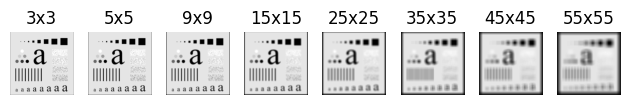

In [104]:
def normalize_mask(mask):
    return mask / np.sum(mask)

def uniform_mask(shape):
    return normalize_mask(np.ones(shape))

def gaussian_mask(shape, sigma=1):
    h1, h2 = shape[0] - 1, shape[1] - 1
    x, y = np.meshgrid(np.arange(0, h2+1), np.arange(0, h1+1))
    x = x - h2/2
    y = y - h1/2
    gauss = 1/(2 * pi * sigma**2) * np.exp(-(x**2 + y**2) / (2 * sigma**2))
    f = gauss
    return normalize_mask(f)
    # return f

# print(gaussian_mesh((7, 7)))

img_test = cv2.imread("images/characters_test_pattern.tif", cv2.IMREAD_GRAYSCALE)
img_test = img_test / 255

imgs = []
sizes = (3, 5, 9, 15, 25, 35, 45, 55)
for size in sizes:
    shape = (size, size)
    filter = uniform_mask(shape)

    imgs.append(scipy.signal.convolve2d(img_test, filter))

show_side_by_side(imgs, [f"{size}x{size}" for size in sizes], vmax=1)

### 2)

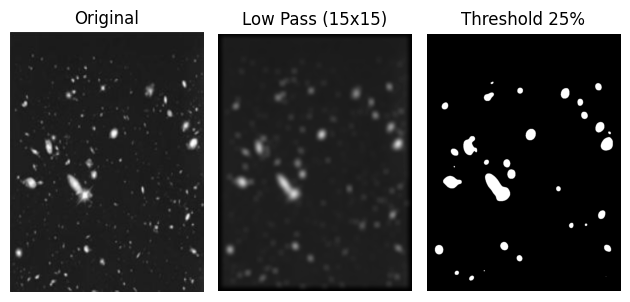

In [127]:
stars_img = cv2.imread("images/stars.png", cv2.IMREAD_GRAYSCALE)
# show_side_by_side([uniform_mask((15, 15)), gaussian_mask((15, 15), sigma=10)], ['uniform', 'gaussian'], vmax=0.01)
# print(gaussian_mask((15, 15)))
low_pass = scipy.signal.convolve2d(stars_img, gaussian_mask((31, 31), sigma=10))
# low_pass = scipy.signal.convolve2d(stars_img, uniform_mask((21, 21)))
threshold = low_pass.copy()
threshold_val = .25 * 256
threshold[threshold < threshold_val] = 0
threshold[threshold >= threshold_val] = 255
show_side_by_side([stars_img, low_pass, threshold], ["Original", "Low Pass (15x15)", "Threshold 25%"])